<div style="float:left">
            <h1 style="width:900px">Exploration and Visualisation of London Fire Incident Distribution Characteristics in Space and Time</h1>
            <h2 style="width:900px">CASA0006: Data Science for Spatial Systems</h2>
</div>

Github repository containing data and code: [see link here](https://github.com/LingruFeng/0006_DSSS_assessment).

# 1. Introduction and Research Question

Because of the human intervention and complex components within the city, unlike the forest-fire system, the urban fire system as one of the dynamic systems presents in a more unique and complicated way in time and space (Song et al., 2003). Spatial pattern analysis in other cities has also proved that there are great differences in fire event distribution between cities, and it is difficult to find a general rule behind the pattern (Vasiliauskas and Beconytė, 2015). Hence, it is necessary to conduct an independent spatio-temporal analysis of fire incidents for cities severally. However, taking London as the research area, the previous studies mainly focus on the fire causes, fire sizes, fire growth rates, time gaps between events and calls, fire case fatalities and so on (Holborn, Nolan and Golt, 2003, 2004). A geographic approach to research fire distribution at the city scale is not enough for London.

Therefore, focusing on London fire cases in 2020, the research question of this report is **whether the occurrence of fire in London has characteristics from the perspective of time and space**, so as to spot the time and area where a fire incident is more likely to occur to give suggestions on the distribution of fire fighting efforts and manage London fire safety.

# 2. Methods

The analysis process can be divided into three parts to explore and visualize: the time characteristics, the spatial characteristics and the spatial-temporal characteristics of London fire incident distribution.

## 2.1 Time of Fire Occurrence for Time Characteristics

According to the statistics of fire frequency in different months and hours, the trend of fire cases in London in a year and a day is visualized respectively through line charts. Then through the heat map and cluster analysis between hours and months, the specific period when fires are more likely to occur is spotted.

## 2.2 Incident Density for Spatial Patterns

Since boroughs and wards are different in shape from each other, which impacts the spatial comparison between areas, instead of the fire case number, the fire case density is used as an index of fire risk within the area. Boroughs and wards with the highest fire risk can be found through sorted incident density bar charts. Then the spatial characteristics of fire incident density at a borough scale and ward scale are represented through thematic maps of fire case density.

## 2.3 Incident Density Grouped by Time for Spatial-temporal Features

The London fire case density of each sub-region and borough in different months and hours was respectively calculated. Generate heatmaps and conduct cluster analysis between space and time to find out which areas in which time periods have higher fire risk.

## 2.4 Clustering

The purpose of this report is to present the time and space features of the London fire incident intuitively, so clustermap is suitable to be applied to present hierarchical relation between two incident attributes. The clustermap method performs hierarchical clustering, so as to discover structure in heatmap data. Taking *u* and *v* as two different clusters, points of *i* and *j* are in *u* and *v* clusters respectively, the linkage method used to compute the Euclidean distance between two clusters is the Nearest Point Algorithm, which implements an optimized algorithm based on minimum spanning tree (Müllner, 2011). The formula of the Nearest Point Algorithm is shown below:

$$ d(u,v) = min(dist(u[i],v[j])). $$

Through iteration, the distance matrix between each cluster is updated. The forest of clusters aggregates from the bottom up until the forest aggregates into a single cluster.

# 3. Data Cleaning and Pre-processing

## 3.1 Packages Demanded

To start with, import all the packages that are required to accomplish the whole process of analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
from legendgram import legendgram
import seaborn as sns

## 3.2 Data Importation

### Import Fire Incident Data

[London Fire Brigade (LFB)](https://www.london-fire.gov.uk/) is the largest firefighting and rescue organization in the UK providing fire and rescue service in London. London Fire Brigade Incident Records is the dataset recording the details of every incident responded by LFB since January 2017. The original dataset has been integrated and published in [London Datastore](https://data.london.gov.uk/dataset/london-fire-brigade-incident-records). As the analysis focuses on the year 2020 only, this London Fire Brigade Incident Records data have been filtered via SQL so that only fires that occurred in 2020 are recorded and then upload the preliminary cropped data to the GitHub repository for importation.

In [2]:
# Import the dataset
url = 'https://github.com/LingruFeng/0006_DSSS_assessment/raw/main/fire_2020.csv'
df = pd.read_csv(url, low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
# Look into the data
df.head(5)

Data frame is 98,567 x 38


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,000455-01012020,2020/1/1,2020,19:56:38,19,False Alarm,AFA,NaN,Non Residential,Cinema,...,Edmonton,277.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,339.0
1,000483-01012020,2020/1/1,2020,21:04:30,21,False Alarm,AFA,NaN,Non Residential,Secondary school,...,Erith,332.0,Plumstead,NaN,NaN,1.0,1.0,1.0,1.0,339.0
2,000367-01012020,2020/1/1,2020,15:46:03,15,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),...,Lee Green,63.0,Lee Green,NaN,NaN,1.0,1.0,1.0,1.0,339.0
3,000369-01012020,2020/1/1,2020,15:51:52,15,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,Homerton,353.0,Homerton,NaN,NaN,1.0,1.0,1.0,1.0,339.0
4,000253-01012020,2020/1/1,2020,9:58:55,9,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,...,Homerton,288.0,Homerton,NaN,NaN,1.0,1.0,1.0,1.0,339.0


### Import Geographic Data

These are geographic boundary data that will be used to generate thematic maps for visualisation later on. Published by Greater London Authority (GLA), [Inner and Outer London Boundaries data](https://data.london.gov.uk/dataset/inner-and-outer-london-boundaries-london-plan-consultation-2009), [London Boroughs data](https://data.london.gov.uk/dataset/london_boroughs), [London Sub-regions data](https://data.london.gov.uk/dataset/sub-regions-london-plan-consultation-2009) and [London ward data](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london) are all accessible to London Datastore. The following code read the boundary data and transformed all the geometries to a new coordinate reference system, which is the British National Grid.

In [3]:
# Read the London ward Boundary data
ward = gpd.read_file('https://github.com/LingruFeng/0006_DSSS_assessment/blob/main/London_ward.gpkg?raw=true')
ward = ward.to_crs('epsg:27700')
# Drop the useless columns
drop_columns = ['NONLD_AREA','DISTRICT']
ward.drop(columns=drop_columns, axis=1,inplace=True)

# Read the London Sub-regions Boundary data
subregions = gpd.read_file('https://github.com/LingruFeng/0006_DSSS_assessment/blob/main/London_subregions.gpkg?raw=true')
subregions = subregions.to_crs('epsg:27700')
# Drop the useless columns
drop_columns = ['Source','Shape_Leng','Shape_Area']
subregions.drop(columns=drop_columns, axis=1,inplace=True)

# Read the Inner and Outer London Boundary data
inner = gpd.read_file('https://github.com/LingruFeng/0006_DSSS_assessment/blob/main/inner_outer.gpkg?raw=true')
inner = inner.to_crs('epsg:27700')
# Drop the useless columns
drop_columns = ['Source','Area_Ha','Shape_Leng','Shape_Area']
inner.drop(columns=drop_columns, axis=1,inplace=True)

# Read the London Borough Boundary data
borough = gpd.read_file('https://github.com/LingruFeng/0006_DSSS_assessment/blob/main/London_Boroughs.gpkg?raw=true')
borough = borough.to_crs('epsg:27700')
# Drop the useless columns
drop_columns = ['objectid','nonld_area','ons_inner']
borough.drop(columns=drop_columns, axis=1,inplace=True)

Check each boundary data.

In [4]:
# Sub-regions data
subregions

,Name,Hectares,geometry
0,West,33868.623153,"MULTIPOLYGON (((526640.502 176973.501, 526646...."
1,North,19853.668947,"MULTIPOLYGON (((537625.100 196029.496, 537603...."
2,Central,13136.020315,"MULTIPOLYGON (((531479.801 186794.300, 531612...."
3,South,44936.520944,"MULTIPOLYGON (((522055.597 178014.703, 522082...."
4,East,47673.767384,"MULTIPOLYGON (((531479.801 186794.300, 531487...."


In [5]:
# Ward data
print('Ward dataframe shape:',ward.shape)
ward.head()

Ward dataframe shape: (657, 5)


,NAME,GSS_CODE,LAGSSCODE,HECTARES,geometry
0,Chessington South,E05000405,E09000021,755.173,"MULTIPOLYGON (((516401.596 160201.802, 516407...."
1,Tolworth and Hook Rise,E05000414,E09000021,259.464,"MULTIPOLYGON (((519552.998 164295.600, 519508...."
2,Berrylands,E05000401,E09000021,145.390,"MULTIPOLYGON (((518107.499 167303.399, 518114...."
3,Alexandra,E05000400,E09000021,268.506,"MULTIPOLYGON (((520336.700 165105.498, 520332...."
4,Beverley,E05000402,E09000021,187.821,"MULTIPOLYGON (((521201.203 169275.505, 521204...."


In [6]:
# Inner-outer Boundary data
inner

,Boundary,geometry
0,Inner London,"POLYGON ((522055.597 178014.703, 521975.801 17..."
1,Outer London,"POLYGON ((503611.197 175520.397, 503613.300 17..."


In [7]:
# Borough Boundary data
print('Borough dataframe shape:',borough.shape)
borough.head()

Borough dataframe shape: (33, 5)


,name,gss_code,hectares,sub_2011,geometry
0,Kingston upon Thames,E09000021,3726.117,South,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,South,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,South,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,West,"POLYGON ((509703.400 175356.600, 509712.600 17..."
4,Ealing,E09000009,5554.428,West,"POLYGON ((515647.200 178787.800, 515608.800 17..."


Get the city of London boundary, which will also be used in visulisation later.

In [8]:
city_of_london = borough[borough.name=='City of London']
city_of_london

,name,gss_code,hectares,sub_2011,geometry
24,City of London,E09000001,314.942,Central,"POLYGON ((531129.700 181291.700, 531110.200 18..."


## 3.3 Data Cleaning

In order to correctly and efficiently run the analysis, problematic rows and useless columns of the fire incident dataset should be cleaned. Below are the steps of DataFrame tidying.

### Drop Rows

As is shown below, there are three types of fire incidents in the list. According to the fire statistics definitions (Home Office, 2018), only the 'Fire' records are real fire incident records.

In [9]:
# See unique incident types of fire records
df_IncidentGroup=df.drop_duplicates(subset='IncidentGroup')
df_IncidentGroup.IncidentGroup

0        False Alarm
2               Fire
3    Special Service
Name: IncidentGroup, dtype: object

Therefore, select the 'fire' records as the new DataFrame.

In [10]:
# Drop every record that is not a real fire incident.
df_fire = df[df.IncidentGroup=='Fire']
# See the filtered data
df_fire.head(5)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
2,000367-01012020,2020/1/1,2020,15:46:03,15,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),...,Lee Green,63.0,Lee Green,NaN,NaN,1.0,1.0,1.0,1.0,339.0
10,000105-01012020,2020/1/1,2020,1:35:32,1,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,Dagenham,339.0,Dagenham,379.0,Dagenham,1.0,2.0,2.0,4.0,1356.0
19,000041-01012020,2020/1/1,2020,0:28:35,0,Fire,Primary Fire,NaN,Dwelling,Licensed House in Multiple Occupation - Up to ...,...,Southall,179.0,Southall,183.0,Southall,3.0,4.0,4.0,5.0,1695.0
22,000103-01012020,2020/1/1,2020,1:31:18,1,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,West Norwood,371.0,West Norwood,NaN,NaN,1.0,1.0,1.0,1.0,339.0
24,000065-01012020,2020/1/1,2020,0:55:10,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,Ealing,295.0,Acton,NaN,NaN,1.0,1.0,1.0,1.0,339.0


### Drop Columns

In [11]:
# Look into the columns of data
print(df_fire.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17400 entries, 2 to 98557
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IncidentNumber                          17400 non-null  object 
 1   DateOfCall                              17400 non-null  object 
 2   CalYear                                 17400 non-null  int64  
 3   TimeOfCall                              17400 non-null  object 
 4   HourOfCall                              17400 non-null  int64  
 5   IncidentGroup                           17400 non-null  object 
 6   StopCodeDescription                     17400 non-null  object 
 7   SpecialServiceType                      0 non-null      object 
 8   PropertyCategory                        17400 non-null  object 
 9   PropertyType                            17400 non-null  object 
 10  AddressQualifier                        17400 non-null  ob

As this report focuses on the spatial and temporal attributes of London fire incidents, columns that are not relevant should be dropped. Due to the serious lack of coordinate data of fire incidents, the longitude and latitude columns of the data set were also excluded, and only ward and borough records in which the fire occurred were retained as spatial attributes.

In [12]:
# Select columns that are useful
df_fire_clean = pd.DataFrame()
df_fire_clean['date'] = df_fire['DateOfCall']
df_fire_clean['hour'] = df_fire['HourOfCall']
df_fire_clean['brough_code'] = df_fire['IncGeo_BoroughCode']
df_fire_clean['ward_code'] = df_fire['IncGeo_WardCode']
df_fire_clean['borough'] = df_fire['ProperCase']
df_fire_clean = df_fire_clean.reset_index()
df_fire_clean.drop(columns='index', axis=1,inplace=True)
# Take a look at the data
print('Shape of data:',df_fire_clean.shape)
df_fire_clean.head()

Shape of data: (17400, 5)


,date,hour,brough_code,ward_code,borough
0,2020/1/1,15,E09000023,E05000447,Lewisham
1,2020/1/1,1,E09000002,E05000027,Barking And dagenham
2,2020/1/1,0,E09000009,E05000190,Ealing
3,2020/1/1,1,E09000022,E05000432,Lambeth
4,2020/1/1,0,E09000009,E05000173,Ealing


### Data Joining

Join the sub-region data into fire incident DataFrame so that each fire incident record has its location of sub-region.

In [13]:
# Join borough data which contains sub-region information into df_fire_incident
df_fire_incident = pd.merge(left=df_fire_clean, right=borough, how='left', left_on='brough_code', right_on='gss_code')
df_fire_incident.drop(columns=['name','gss_code','geometry','hectares'],axis=1,inplace=True)
# Rename the columns
df_fire_incident.columns=['date','hour','brough_code','ward_code','borough','subregion']
# Take a look at the data
print('Shape of data:',df_fire_incident.shape)
df_fire_incident.head()

Shape of data: (17400, 6)


,date,hour,brough_code,ward_code,borough,subregion
0,2020/1/1,15,E09000023,E05000447,Lewisham,East
1,2020/1/1,1,E09000002,E05000027,Barking And dagenham,East
2,2020/1/1,0,E09000009,E05000190,Ealing,West
3,2020/1/1,1,E09000022,E05000432,Lambeth,Central
4,2020/1/1,0,E09000009,E05000173,Ealing,West


### Data Converting

In [14]:
# Look into the columns of data
print(df_fire_incident.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17400 entries, 0 to 17399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         17400 non-null  object
 1   hour         17400 non-null  int64 
 2   brough_code  17400 non-null  object
 3   ward_code    17400 non-null  object
 4   borough      17400 non-null  object
 5   subregion    17400 non-null  object
dtypes: int64(1), object(5)
memory usage: 951.6+ KB
None


Obviously, the data types of the dataset are problematic. Therefore convert the data types into correct ones.

In [15]:
# Data converting
df_fire_incident['date'] = pd.to_datetime(df_fire_incident['date'], infer_datetime_format=True)
df_fire_incident['hour'] = df_fire_incident['hour'].astype("category")
df_fire_incident['brough_code'] = df_fire_incident['brough_code'].astype("category")
df_fire_incident['ward_code'] = df_fire_incident['ward_code'].astype("category")
df_fire_incident['borough'] = df_fire_incident['borough'].astype("category")
df_fire_incident['subregion'] = df_fire_incident['subregion'].astype("category")

According to the date of the fire incidents, which is the 'date' column, the month in which the event occurred could be summarized.

In [16]:
# Add 'month' column to the dataframe and convert to the right datatype
df_fire_incident['month'] = df_fire_incident['date'].dt.month.astype("category")

In [17]:
# Set df_fire_clean as the final cleaned dataframe of fire incident
df_fire_clean = df_fire_incident
# Check the data type
print(df_fire_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17400 entries, 0 to 17399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17400 non-null  datetime64[ns]
 1   hour         17400 non-null  category      
 2   brough_code  17400 non-null  category      
 3   ward_code    17400 non-null  category      
 4   borough      17400 non-null  category      
 5   subregion    17400 non-null  category      
 6   month        17400 non-null  category      
dtypes: category(6), datetime64[ns](1)
memory usage: 420.3 KB
None


In [18]:
# Take a look at the data
print('Shape of cleaned data:',df_fire_clean.shape)
df_fire_clean.head()

Shape of cleaned data: (17400, 7)


,date,hour,brough_code,ward_code,borough,subregion,month
0,2020-01-01,15,E09000023,E05000447,Lewisham,East,1
1,2020-01-01,1,E09000002,E05000027,Barking And dagenham,East,1
2,2020-01-01,0,E09000009,E05000190,Ealing,West,1
3,2020-01-01,1,E09000022,E05000432,Lambeth,Central,1
4,2020-01-01,0,E09000009,E05000173,Ealing,West,1


Now the data has been cleaned and in the right format. It can be seen that there used to be 17400 fire incidents in London during the year 2020.

# 4. Analysis Results and Visualisation

## 4.1 Time of Fire Incident

### Monthly Frequency

Count the number of fires from January to December in 2020 and plot the line graph.

In [19]:
# Count the number of fire per month
fire_month=df_fire_clean.groupby('month').size()
# Creat a dataframe to store the monthly incident calculation
incident_month=pd.DataFrame()
month_list = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec'])
incident_month['month'] = month_list
incident_month['Incidents']=np.array(fire_month)
# Take a look at the table
incident_month.head()

,month,Incidents
0,Jan,1215
1,Feb,1097
2,Mar,1357
3,Apr,1646
4,May,2127


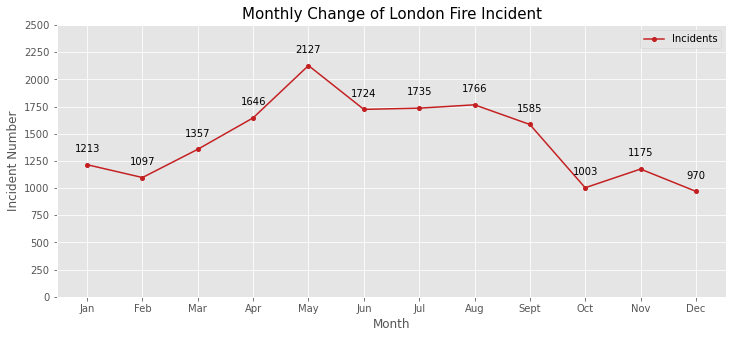

In [20]:
# Draw a line chart showing the number of fires changing by month
# Set plot style
plt.style.use('ggplot')
# Plot the data
incident_month.plot(color = '#C42022',marker = 'o',markersize = 4,figsize=(12,5))
plt.xlabel('Month')
plt.ylabel('Incident Number')
# Label the data
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array([1213,1097,1357,1646,2127,1724,1735,1766,1585,1003,1175,970])
for a,b in zip(x,y):
    plt.text(a,b+100,b,ha='center',va="bottom",fontsize=10)
# Set x axis
scale_ls = range(12)
index_ls = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov','Dec']
plt.xticks(scale_ls,index_ls)
# Set y axis
my_y_ticks = np.arange(0, 2750, 250)
plt.yticks(my_y_ticks)
# Set title
plt.title('Monthly Change of London Fire Incident',fontsize = 15)

plt.legend()
plt.show()

As is shown in the above line chart of the London fire incident number changing through months, the fire risk gradually increased from January, reached the peak in May at the case number of 2127, and then gradually dropped to 970 cases a month, which is the lowest value in the second half of the year.

### Hourly Frequency

Calculate the number of fires hour by hour in 2020 and draw the line chart.

In [21]:
# Count the number of fires per hour
fire_hour=df_fire_clean.groupby('hour').size()
# Creat a dataframe to store the monthly incident calculation
incident_hour=pd.DataFrame()
hour_list = np.array(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
incident_hour['hour'] = hour_list
incident_hour['Incidents']=np.array(fire_hour)
# Take a look at the table
incident_hour.head()

,hour,Incidents
0,0,624
1,1,509
2,2,405
3,3,305
4,4,239


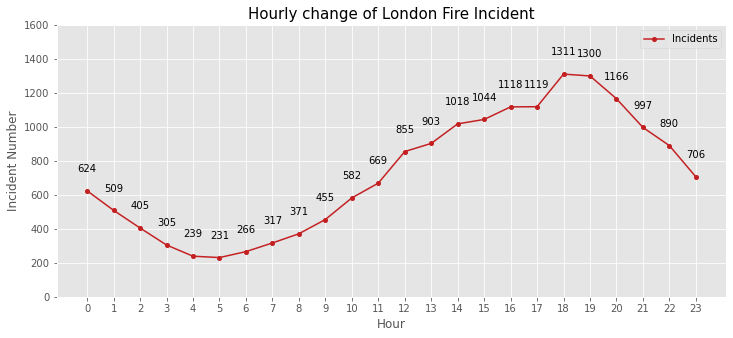

In [22]:
# Draw a line chart of the number of fires by hour
# Plot the data
incident_hour.plot(color = '#C42022',marker = 'o',markersize = 4,figsize=(12,5))
plt.xlabel('Hour')
plt.ylabel('Incident Number')
# Label the data
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
y = np.array(fire_hour)
for a,b in zip(x,y):
    plt.text(a,b+100,b,ha='center',va="bottom",fontsize=10)
# Set x axis
scale_ls = range(24)
index_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks(scale_ls,index_ls)
# Set y axis
my_y_ticks = np.arange(0, 1750, 200)
plt.yticks(my_y_ticks)
# Set title
plt.title('Hourly change of London Fire Incident',fontsize = 15)

plt.legend()
plt.show()

As is shown in the above line chart of the London fire incident number changing through hours, the line chart has a peak value and a valley value. The possibility that an incident happens between 5:00 to 6:00 is the lowest while between 18:00 to 19:00 is the highest. This means that fires are much more likely to occur during the day than at night. The most dangerous hours are from afternoon to evening.

### Combining Month and Hour

To see if there is any feature in the time of a fire occurrence combining timing of hour and month, calculate the number of incidents grouped by month and hour, and then generate the heatmap and clustermap for intuitively observation so that in which specific hours of months fires are more likely to break out can be found.

In [23]:
# Create a dataframe claculating the incidents grouped by month and hour
month_hour=df_fire_clean.groupby('month').hour.value_counts(sort=True)
t=month_hour.unstack().fillna(0)
# Take a look at the grouped table
t.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,55,45,29,25,12,12,27,19,26,41,...,67,76,78,78,74,95,92,74,49,45
2,39,23,24,11,12,5,24,20,18,32,...,83,67,76,66,89,90,66,61,60,41
3,38,43,27,24,14,24,12,21,31,38,...,69,86,112,83,123,91,78,65,62,53
4,57,49,32,31,16,29,26,24,33,42,...,90,97,97,96,114,117,162,107,99,49
5,74,53,46,42,25,23,28,45,37,49,...,131,118,157,135,150,175,151,135,87,106


Because the hour and month are categorical data with specific sequences, a fire incident number heatmap of the hour and month could be plotted to see if there is any feature in the time of fire occurrence.

Text(0.5, 1.0, 'Heatmap of London Fire Incident Number in 2020 (Grouped by Month and Hour)')

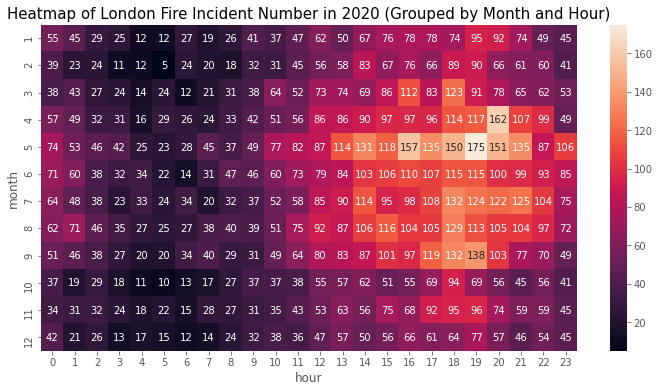

In [24]:
# Plot the heatmap of incident number grouped by month and hour
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(t, annot=True, fmt="d",ax=ax)
plt.title('Heatmap of London Fire Incident Number in 2020 (Grouped by Month and Hour)',fontsize = 15)

It is obvious that there is an area of highlight concentration in the heatmap above. With 19:00 in May as the center, its adjacent months and hours show the characteristics of high fire risk.

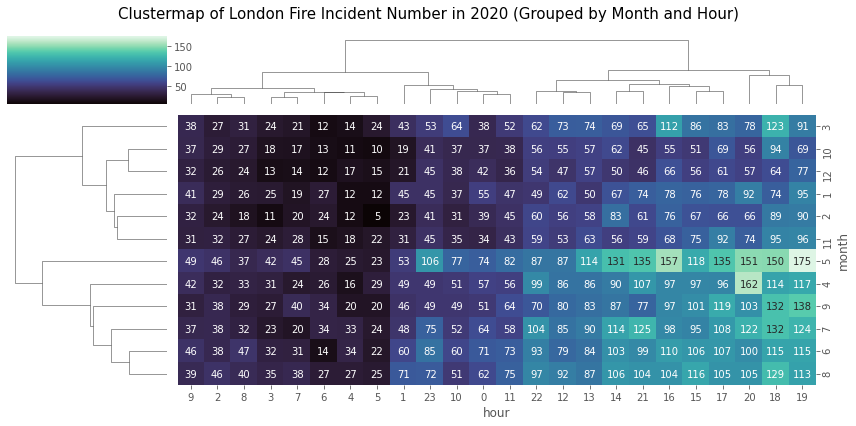

In [25]:
# Plot the clustermap of incident number grouped by month and hour
g = sns.clustermap(t, annot=True, fmt="d",figsize=(12,6),cmap="mako")
g.fig.suptitle('Clustermap of London Fire Incident Number in 2020 (Grouped by Month and Hour)',fontsize = 15)
plt.tight_layout()

Time periods can be roughly divided into four clusters according to the clustermap shown above. The highest case numbers cluster at the lower right corner on the map turns out to be the most fire-prone period, which means the time from 12:00 to 24:00 in April to September is the period when fires occur most frequently. The time between 12:00 and 24:00 in October and March takes the second place. Fires are less likely to break out in The lowest case numbers cluster at the upper left corner on the map, which is between 0 and 11:00 in October and March. To conclude, fires are more likely to occur from the end of spring to summer in the afternoon.

## 4.2 Spatial Density of Fire Incident

Taking the number of fires in each borough/ward in 2020 divided by the area as the density index of fire risk in this region, boroughs/wards with high fire risk and the spatial distribution characteristics of fire incident density are explored below.

### London Borough Fire Incident Density

First, calculate the fire incident density for each borough.

In [26]:
# Calculate each borough's one year fire incident number
borough_fire_count=pd.DataFrame()
borough_fire_count['count'] = df_fire_clean.groupby('brough_code').size()
borough_fire_count.reset_index(inplace=True)
# Rename the columns
borough_fire_count.columns = ['borough','count']

# Join the borough fire incident count data into borough boundary
fire_borough = pd.merge(left=borough, right=borough_fire_count, how='left', left_on='gss_code', right_on='borough')

# Calculate the fire incident density (incident number per 100 hectares) in each borough
fire_borough['density'] = round(fire_borough['count']/fire_borough['hectares']*100,2).astype('float')
# check the data
print('Shape of fire_borough dataframe:',fire_borough.shape)
fire_borough.head()

Shape of fire_borough dataframe: (33, 8)


,name,gss_code,hectares,sub_2011,geometry,borough,count,density
0,Kingston upon Thames,E09000021,3726.117,South,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,233,6.25
1,Croydon,E09000008,8649.441,South,"POLYGON ((535009.200 159504.700, 535005.500 15...",E09000008,772,8.93
2,Bromley,E09000006,15013.487,South,"POLYGON ((540373.600 157530.400, 540361.200 15...",E09000006,663,4.42
3,Hounslow,E09000018,5658.541,West,"POLYGON ((509703.400 175356.600, 509712.600 17...",E09000018,705,12.46
4,Ealing,E09000009,5554.428,West,"POLYGON ((515647.200 178787.800, 515608.800 17...",E09000009,776,13.97


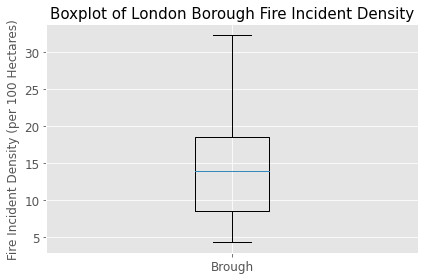

In [27]:
# Boxplot the Fire Incident density at a brough scale
plt.title('Boxplot of London Borough Fire Incident Density', fontsize=15)
plt.boxplot(fire_borough['density'],widths=0.2)
plt.xticks([1], ["Brough"],fontsize=12)
plt.tick_params(labelsize=12)
plt.ylabel("Fire Incident Density (per 100 Hectares)",fontsize=12)

plt.tight_layout()

According to the boxplot of London borough fire incident density above, it seems that there is no outlier and the interquartile tends to be left-skewed, which means most of the boroughs' fire risks are at a lower level.

By plotting the fire density bar chart sorted in descending order, those boroughs with the highest fire risks can be spotted.

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


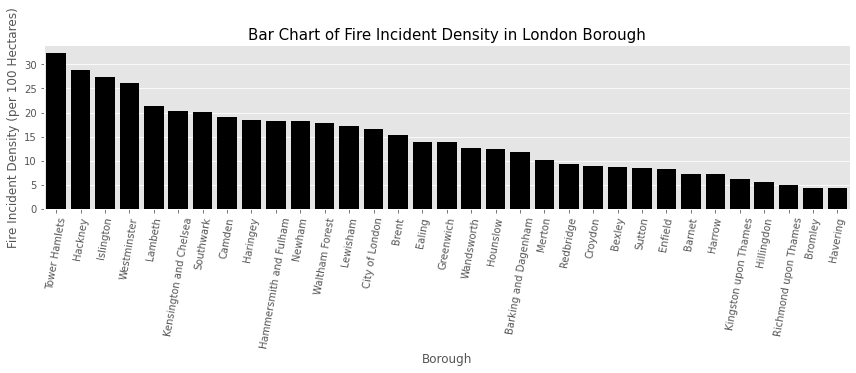

In [28]:
# Bar plot the Fire Incident density at a borough scale
# Subset the fire_borough dataframe
fire_borough_sub = fire_borough[['name','density']]
fire_borough_sub.columns =["Borough","Density"]

# sort fire_borough_sub by 'Density' column
fire_borough_sub = fire_borough_sub.sort_values(['Density'],ascending=False).reset_index(drop=True)

# Bar plot the borough fire incident density
plt.figure(figsize=(12,5))
plt.title('Bar Chart of Fire Incident Density in London Borough', fontsize=15)
# plot bar chart 
ax = sns.barplot(fire_borough_sub.Borough, fire_borough_sub.Density,color = 'k')
# plot bar chart with Borough name as x values
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Borough", ylabel='Fire Incident Density (per 100 Hectares)')
for item in ax.get_xticklabels():
    item.set_rotation(80)
    
plt.tight_layout()
plt.show()

The bar graph above gives the information that boroughs in which the fire incident densities are over 25 cases per 100 hectares are Tower Hamlets, Hackney, Islington and Westminster, which are the top four boroughs with the highest density among 33 boroughs. On the other hand, boroughs like Bromley and Havering are less likely to break out a fire, with fire densities less than a fifth of those in the top four.

Next, the distribution of fire density at a borough scale is presented by a map.

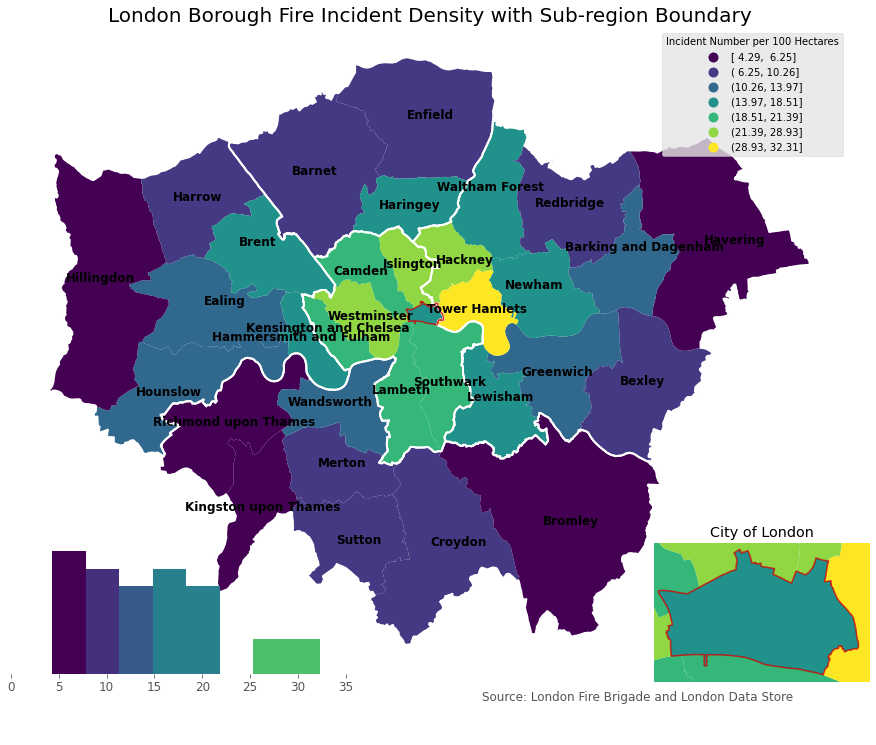

In [29]:
# generate the borough fire incident density map
def borough_fire_density():
    f,ax = plt.subplots(figsize=(15,12))
    
    # Plot the density of fire in each ward
    fire_borough.plot(ax=ax,column='density', edgecolor='None',
              scheme='NaturalBreaks',k=7,legend=True)
    
    # Add borough label to the map
    c=fire_borough
    c=c.drop(index=(c.loc[(c.name=='City of London')].index))
    c['coords'] = c['geometry'].apply(lambda x: x.representative_point().coords[:])
    c['coords'] = [coords[0] for coords in c['coords']]
    for idx, row in c.iterrows():
        plt.annotate(text=row['name'], xy=row['coords'],horizontalalignment='center',color='black',weight = 'bold',size = 'large')
    
    # Draw the outline of London sub-region boundary
    subregions.plot(edgecolor='white', facecolor='none', linewidth=2, ax=ax)
    ax.axis('off') 
    
    # Draw the outline of city of London
    city_of_london.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1.5, ax=ax)
    ax.axis('off')
    
    # Set title and annotation
    ax.set_title('London Borough Fire Incident Density with Sub-region Boundary', fontdict={'fontsize':'20', 'fontweight':'3'})
    a = ax.annotate('Source: London Fire Brigade and London Data Store',
                 xy=(0.905, 0.055), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='bottom', 
                 fontsize=12, fontweight=4, color='#555555')
    
    # Draw a zoom in map to better visualize the City of London area   
    ax2 = f.add_axes([0.72, 0.1, 0.2, 0.2])
    fire_borough.plot(column='density',edgecolor='None', scheme='NaturalBreaks',k=7,legend=False,ax=ax2)
    ax2.set_xlim([530900,534000])
    ax2.set_ylim([180300,182300])
    ax2.set_title('City of London')
    city_of_london.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1.5, ax=ax2)
    ax2.axis('off')
    
    # Draw the legend
    a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
    ax.get_legend().set_title("Incident Number per 100 Hectares")
    #font1={}

    # Draw the histogram of incident density
    q = mc.NaturalBreaks(fire_borough.density, k=7)
    legendgram(f, ax, 
                fire_borough.density, q.bins, bins=round(fire_borough.density.max()/4),
                pal=palmpl.Viridis_7,
                legend_size=(0.4, 0.2), 
                loc='best',
                clip=(0,35),
                frameon=False)
    
# Plot
borough_fire_density()

Through the map above, it is more intuitive to discover the spatial autocorrelation of borough fire incident density. Boroughs within Central London and the west of East London present to have higher density compared with Boroughs in North, South and West London.

### London Ward Fire Incident Density

Calculate the fire density for each ward.

In [30]:
# Calculate each ward's one year fire incident munber
ward_fire_count=pd.DataFrame()
ward_fire_count['count'] = df_fire_clean.groupby('ward_code').size()
ward_fire_count.reset_index(inplace=True)
# Rename the columns
ward_fire_count.columns = ['ward_code','count']

# Join the ward fire incident count data into ward boundary data
fire_ward = pd.merge(left=ward, right=ward_fire_count, how='left', left_on='GSS_CODE', right_on='ward_code')
fire_ward.drop(columns = 'ward_code',inplace = True)
# Fill the null value to 0 and change the data type
fire_ward['count'] = fire_ward['count'].fillna(value=0)
# Calculate the fire incident density (incident number per 100 hectares) in each ward
fire_ward['density'] = round(fire_ward['count']/fire_ward['HECTARES']*100,2).astype('float')
# check the data
print('Shape of fire_ward dataframe:',fire_ward.shape)
fire_ward.head()

Shape of fire_ward dataframe: (657, 7)


,NAME,GSS_CODE,LAGSSCODE,HECTARES,geometry,count,density
0,Chessington South,E05000405,E09000021,755.173,"MULTIPOLYGON (((516401.596 160201.802, 516407....",19.0,2.52
1,Tolworth and Hook Rise,E05000414,E09000021,259.464,"MULTIPOLYGON (((519552.998 164295.600, 519508....",19.0,7.32
2,Berrylands,E05000401,E09000021,145.390,"MULTIPOLYGON (((518107.499 167303.399, 518114....",20.0,13.76
3,Alexandra,E05000400,E09000021,268.506,"MULTIPOLYGON (((520336.700 165105.498, 520332....",7.0,2.61
4,Beverley,E05000402,E09000021,187.821,"MULTIPOLYGON (((521201.203 169275.505, 521204....",17.0,9.05


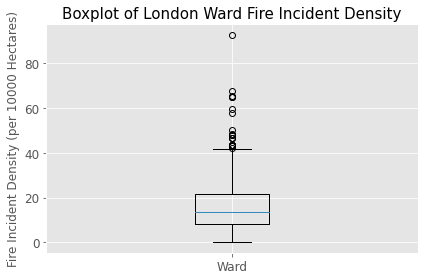

In [31]:
# Boxplot the Fire Incident density at a ward scale
plt.title('Boxplot of London Ward Fire Incident Density', fontsize=15)
plt.boxplot(fire_ward['density'],widths=0.2)
plt.xticks([1], ["Ward"],fontsize=12)
plt.tick_params(labelsize=12)
plt.ylabel("Fire Incident Density (per 10000 Hectares)",fontsize=12)

plt.tight_layout()

According to the boxplot of London ward fire incident density above, it seems that there are outliers that fall above the upper quartile, and the interquartile tends to be left-skewed, which means there are great differences in fire density among wards, and most of the wards' fire risks are at a lower level while some wards suffer from extremely high fire risk.

Therefore, through the fire density bar chart sorted in descending order, those wards with the highest fire risks can be spotted.

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


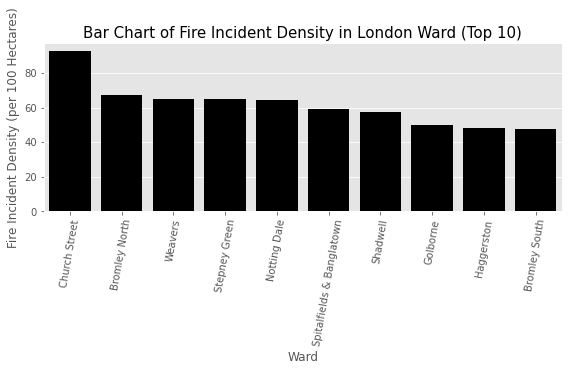

In [32]:
# Bar plot the Fire Incident density at a ward scale
# Subset the fire_borough dataframe
fire_ward_sub = fire_ward[['NAME','density']]
fire_ward_sub.columns =["Ward","Density"]

# sort fire_borough_sub by 'Density' column
fire_ward_sub = fire_ward_sub.sort_values(['Density'],ascending=False).reset_index(drop=True)
# Filter the top 10 ward records that have the highest density 
fire_ward_sub = fire_ward_sub[0:10]

# Bar plot the borough fire incident density
plt.figure(figsize=(8,5))
plt.title('Bar Chart of Fire Incident Density in London Ward (Top 10)', fontsize=15)
# plot bar chart 
ax = sns.barplot(fire_ward_sub.Ward, fire_ward_sub.Density,color = 'k')
# plot bar chart with Borough name as x values
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Ward", ylabel='Fire Incident Density (per 100 Hectares)')
for item in ax.get_xticklabels():
    item.set_rotation(80)
plt.tight_layout()
plt.show()

The bar chart above presents 10 wards with the highest fire incident density, the density of which are all above 40 cases per 100 hectares. Among them, Church Street, as the ward with the highest fire density in London, its fire risk is far ahead of Bromley North, which ranks second.

Next, the distribution of fire density at a ward scale is presented by a map.

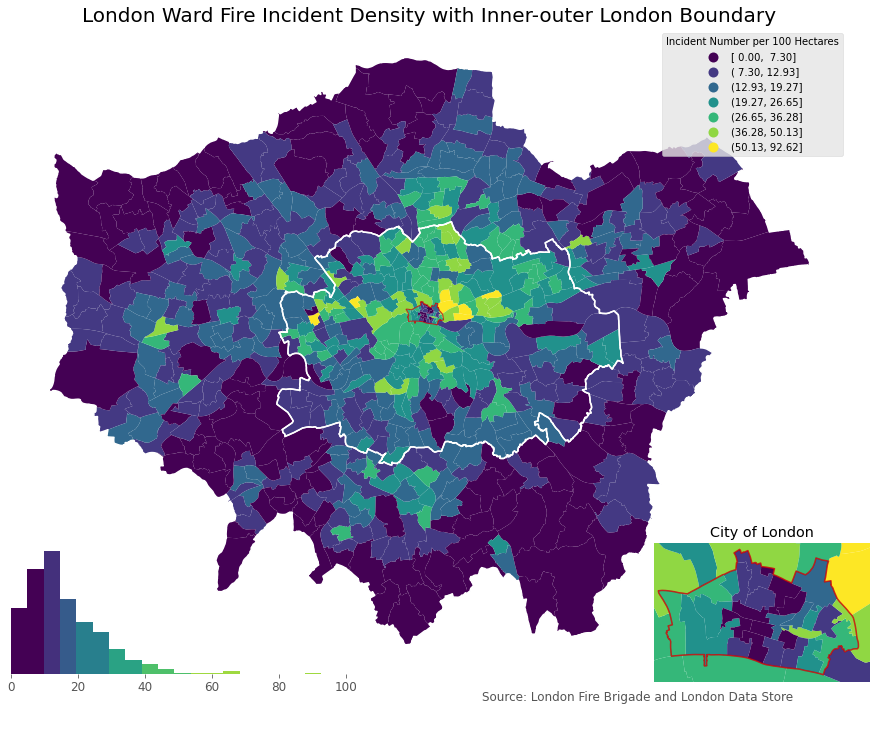

In [33]:
# generate the ward fire incident density map
def ward_fire_density():
    f,ax = plt.subplots(figsize=(15,12))
    
    # Plot the density of fire in each ward
    fire_ward.plot(ax=ax,column='density', edgecolor='None',
              scheme='NaturalBreaks',k=7,legend=True)
    
    # Draw the outline of London inner-outer boundary and city of London
    inner.plot(edgecolor='white', facecolor='none', linewidth=1.5, ax=ax)
    city_of_london.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1, ax=ax)
    ax.axis('off') 
    
    # Set title and annotation
    ax.set_title('London Ward Fire Incident Density with Inner-outer London Boundary', fontdict={'fontsize':'20', 'fontweight':'3'})
    a = ax.annotate('Source: London Fire Brigade and London Data Store',
                 xy=(0.905, 0.055), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='bottom', 
                 fontsize=12, fontweight=4, color='#555555')
    # Draw the legend
    a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
    ax.get_legend().set_title("Incident Number per 100 Hectares")
    font1={}

    # Draw a zoom in map to better visualize the City of London area   
    ax2 = f.add_axes([0.72, 0.1, 0.2, 0.2])
    fire_ward.plot(column='density',edgecolor='None', scheme='NaturalBreaks',k=7,legend=False,ax=ax2)
    ax2.set_xlim([530900,534000])
    ax2.set_ylim([180300,182300])
    ax2.set_title('City of London')
    city_of_london.plot(edgecolor=(0.8, 0, 0,0.8), facecolor='none', linewidth=1.5, ax=ax2)
    ax2.axis('off')

    # Draw the histogram of incident density
    q = mc.NaturalBreaks(fire_ward.density, k=7)
    legendgram(f, ax, 
                fire_ward.density, q.bins, bins=round(fire_ward.density.max()/5),
                pal=palmpl.Viridis_7,
                legend_size=(0.4, 0.2), 
                loc='best',
                clip=(0,100),
                frameon=False)

# Plot
ward_fire_density()

Similar to the distribution of borough fire incident density, the high value of ward fire incident density also showed a trend of clustering to the center. The wards around the City of London form a high-density cluster despite the wards in the City of London themselves do not show a very high fire risk. Overall, wards in Inner London are more likely to break out a fire than those in Outer London.

## 4.3 Spatial-temporal Clustering

The spatial and temporal characteristics of fire incidents can be explored together. So the following part performs cluster analysis on the region and time at different scales in pairs. Heatmaps and clustermaps are generated respectively to seek out the features in a combination of space and time. The density is measured in cases per 10,000 hectares.

## 

### Between Sub-region and Month

First, calculate the fire incident density grouped by sub-region and month.

In [34]:
# Calculate each incident/its belonging area for further incident density summarisation
# calculate 1/subregion area*10000 (incident density per 10000 hectares)
df_fire_add_subarea = pd.merge(left=df_fire_clean, right=subregions, how='left', left_on='subregion', right_on='Name')
df_fire_add_subarea['density'] = 1/df_fire_add_subarea['Hectares']*10000
df_fire_add_subarea = df_fire_add_subarea[['subregion','month','hour','density']]
# Take a look at the data
print('Shape of data:',df_fire_add_subarea.shape)
df_fire_add_subarea.head()

Shape of data: (17400, 4)


,subregion,month,hour,density
0,East,1,15,0.209759
1,East,1,1,0.209759
2,West,1,0,0.295259
3,Central,1,1,0.761266
4,West,1,0,0.295259


In [35]:
# Create a dataframe adding the incident denisty (number of incident per 10000 hectares) grouped by month and sub-region
month_sub=df_fire_add_subarea.groupby(['subregion','month'])[['density']].sum()
month_sub = month_sub['density'].unstack(level=-1)
month_sub = round(month_sub,0).astype('int')
# Take a look at the data
month_sub

month,1,2,3,4,5,6,7,8,9,10,11,12
subregion,,,,,,,,,,,,
Central,178,158,198,152,240,202,176,208,193,157,177,158
East,85,79,97,123,154,124,133,132,115,69,79,65
North,66,62,76,90,109,99,87,88,87,53,72,51
South,47,38,53,74,92,67,71,73,65,39,49,38
West,69,64,72,103,132,109,112,107,95,54,61,53


Then, heatmap and clustermap are plotted below.

Text(0.5, 1.0, 'Heatmap of London Fire Incident Density (Grouped by Month and Sub-region)')

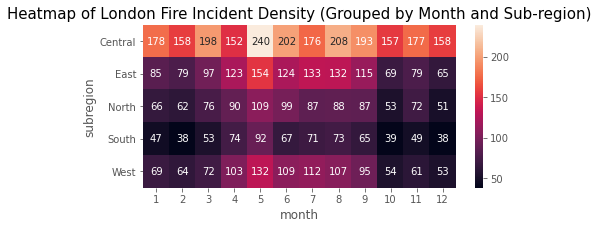

In [36]:
# Plot the heatmap of incident denisty (number of incident per 10000 hectares) grouped by month and sub-region
fig, ax = plt.subplots(figsize=(7,3))
sns.heatmap(month_sub, annot=True, fmt="d",ax=ax)
plt.title('Heatmap of London Fire Incident Density (Grouped by Month and Sub-region)',fontsize = 15)

Through the heatmap, it can be observed that Central London is more likely to cause a fire, and May is the most dangerous month in this region.

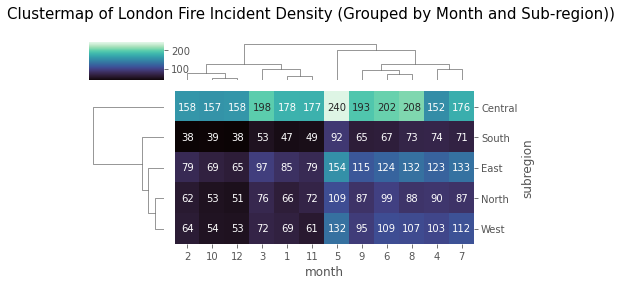

In [37]:
# Plot the clustermap of incident denisty (number of incident per 10000 hectares) grouped by month and sub-region
g = sns.clustermap(month_sub,cmap="mako",figsize=(6.5,4), annot=True, fmt="d")
g.fig.suptitle('Clustermap of London Fire Incident Density (Grouped by Month and Sub-region))',fontsize = 15)
plt.tight_layout()

The matrix can be roughly divided into four clusters according to the clustermap shown above. Central London from April to September is the most dangerous as a high-density cluster.

### Between Sub-region and Hour

First, calculate the fire incident density grouped by sub-region and hour.

In [38]:
# Create a dataframe adding the incident denisty (number of incident per 10000 hectares) grouped by hour and sub-region
hour_sub=df_fire_add_subarea.groupby(['subregion','hour'])[['density']].sum()
hour_sub = hour_sub['density'].unstack(level=-1)
hour_sub = round(hour_sub,0).astype('int')
hour_sub

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
subregion,,,,,,,,,,,,,,,,,,,,,
Central,74,70,53,49,30,37,36,43,53,67,...,120,116,132,143,167,142,157,126,103,109
East,44,36,29,23,20,17,23,22,27,30,...,75,72,81,82,91,97,84,73,64,48
North,38,29,20,13,9,13,9,16,20,25,...,63,60,58,53,66,69,54,66,48,43
South,22,16,17,11,8,8,8,12,13,21,...,43,41,51,44,59,61,53,37,37,25
West,42,33,23,16,14,12,17,20,22,24,...,56,72,64,70,78,72,62,56,55,40


Then, heatmap and clustermap are plotted below.

Text(0.5, 1.0, 'Heatmap of London Fire Incident Density (Grouped by Hour and Sub-region)')

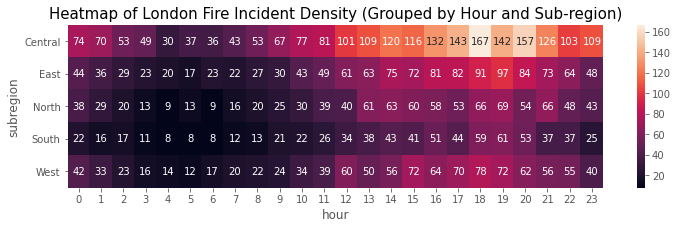

In [39]:
# Plot the heatmap of incident denisty (number of incident per 10000 hectares) grouped by hour and sub-region
fig, ax = plt.subplots(figsize=(12,3))
sns.heatmap(hour_sub, annot=True, fmt="d",ax=ax)
plt.title('Heatmap of London Fire Incident Density (Grouped by Hour and Sub-region)',fontsize = 15)

Through the heatmap, it can be observed that Central London is still more likely to cause a fire among all sub-regions, especially in the afternoon, and 18:00 to 19:00 is the most dangerous hour in this place to break out a fire.

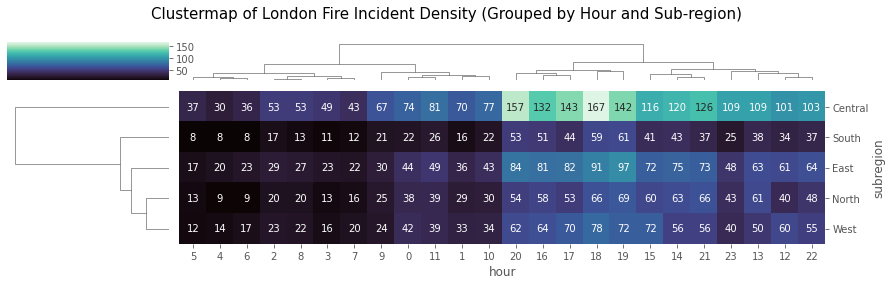

In [40]:
# Plot the clustermap of incident denisty (number of incident per 10000 hectares) grouped by hour and sub-region
g = sns.clustermap(hour_sub,cmap="mako",figsize=(12.5,4), annot=True, fmt="d")
g.fig.suptitle('Clustermap of London Fire Incident Density (Grouped by Hour and Sub-region)',fontsize = 15)
plt.tight_layout()

The matrix can be roughly divided into four clusters according to the clustermap shown above. Central London in the hour of 12:00 to 24:00 is the most dangerous as a high-density cluster. Moreover, for all sub-regions, fires are more likely to occur between 12:00 and 24:00 than between 0:00 and 12:00.

### Between Borough and Month

First, calculate the fire incident density grouped by borough and month.

In [41]:
# Calculate each incident/its belonging area for further incident density summation
# 1/borough area*10000 (incident density per 10000 hectares)
df_fire_add_borougharea = pd.merge(left=df_fire_clean, right=borough, how='left', left_on='brough_code', right_on='gss_code')
df_fire_add_borougharea['density'] = 1/df_fire_add_borougharea['hectares']*10000
df_fire_add_borougharea = df_fire_add_borougharea[['borough','month','hour','density']]

# Create a dataframe adding the incident denisty (number of incident per 10000 hectares) grouped by month and borough
month_borough=df_fire_add_borougharea.groupby(['borough','month'])[['density']].sum()
month_borough = month_borough['density'].unstack(level=-1)
month_borough = round(month_borough,0).astype('int')

# Check the data
month_borough.head(5)

month,1,2,3,4,5,6,7,8,9,10,11,12
borough,,,,,,,,,,,,
Barking And dagenham,82,66,106,101,183,87,114,143,103,77,77,53
Barnet,48,47,74,70,90,82,69,69,63,32,50,38
Bexley,44,50,47,84,126,86,101,95,86,54,50,53
Brent,83,95,109,148,208,176,146,146,141,74,123,95
Bromley,26,21,28,65,53,35,47,56,43,21,23,23


Then, heatmap and clustermap are plotted below.

Text(0.5, 1.0, 'Heatmap of London Fire Incident Density (Grouped by Month and Borough)')

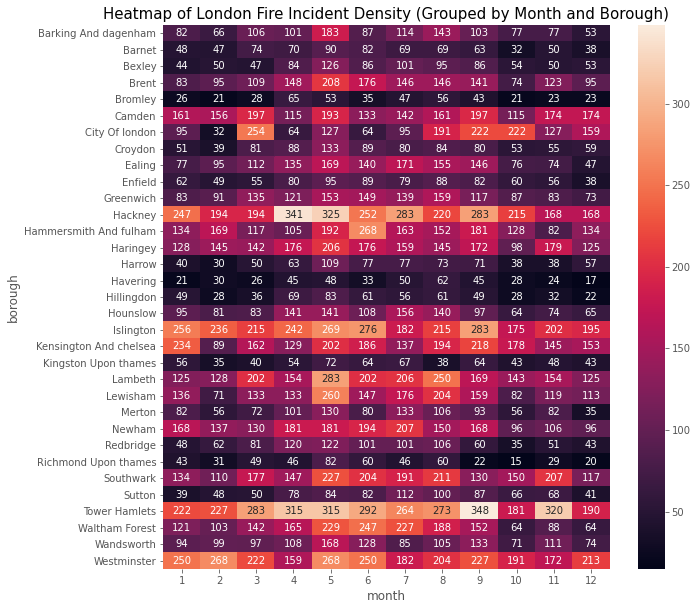

In [42]:
# Plot the heatmap of incident denisty (number of incident per 10000 hectares) grouped by month and borough
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(month_borough, annot=True, fmt="d",ax=ax)
plt.title("Heatmap of London Fire Incident Density (Grouped by Month and Borough)",fontsize=15)

The heatmap shown above indicates that some areas are more likely to suffer from a fire in a specific period of months. For example, Tower Hamlets in September and November, Hackney in April and May.

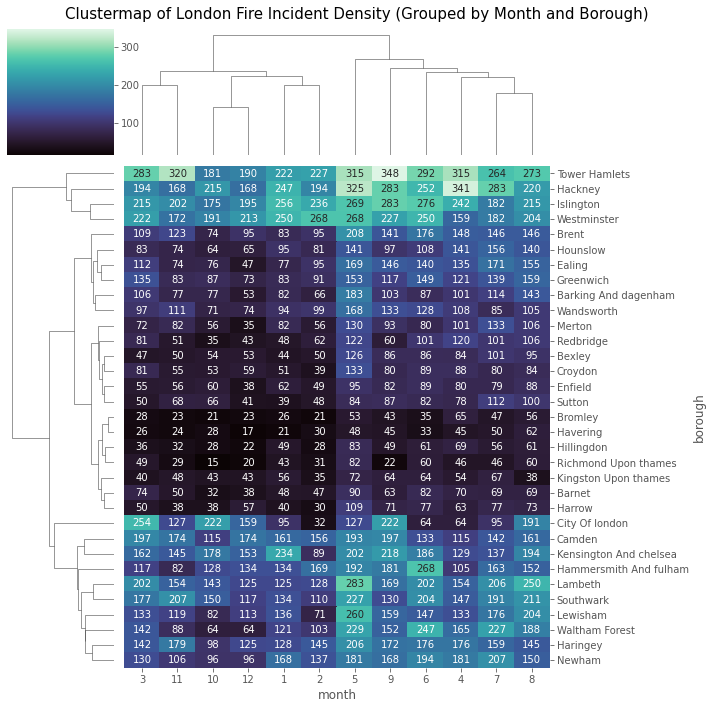

In [43]:
# Plot the clustermap of incident denisty (number of incident per 10000 hectares) grouped by month and borough
g = sns.clustermap(month_borough,cmap="mako", annot=True, fmt="d")
g.fig.suptitle('Clustermap of London Fire Incident Density (Grouped by Month and Borough)',fontsize = 15)
plt.tight_layout()

The matrix can be roughly divided into six clusters according to the clustermap shown above. Tower Hamlets, Hackney, Islington and Westminster from April to September as clusters with highest fire desity，following up with City of London, Camden, Kensington and Chelsea, Hammersmith and Fulham, Lambeth, Southwark, Lewisham, Waltham Forest, Haringey and Newham from April to September as the second-highest density cluster, are in need of fire prevention most.

### Between Borough and Hour

First, calculate the fire incident density grouped by borough and hour.

In [44]:
# Create a dataframe adding the incident denisty (number of incident per 10000 hectares) grouped by hour and borough
hour_borough=df_fire_add_borougharea.groupby(['borough','hour'])[['density']].sum()
hour_borough = hour_borough['density'].unstack(level=-1).fillna(0)
hour_borough = round(hour_borough,0).astype('int')

# Check the data
print('Shape of Data:',hour_borough.shape)
hour_borough.head(5)

Shape of Data: (33, 24)


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
borough,,,,,,,,,,,,,,,,,,,,,
Barking And dagenham,61,53,53,24,16,5,13,16,32,24,...,58,69,87,69,87,82,82,50,79,61
Barnet,17,15,8,9,3,5,5,14,15,24,...,54,55,52,44,53,60,43,55,37,36
Bexley,28,28,12,22,19,14,19,12,17,12,...,47,56,54,65,68,75,56,50,42,28
Brent,81,65,44,37,19,19,23,32,39,46,...,83,102,83,102,116,81,86,97,93,46
Bromley,20,11,7,11,5,3,8,7,5,10,...,27,26,27,31,42,40,35,21,27,13


Then, heatmap and clustermap are plotted below.

Text(0.5, 1.0, 'Heatmap of London Fire Incident Density (Grouped by Hour and Borough)')

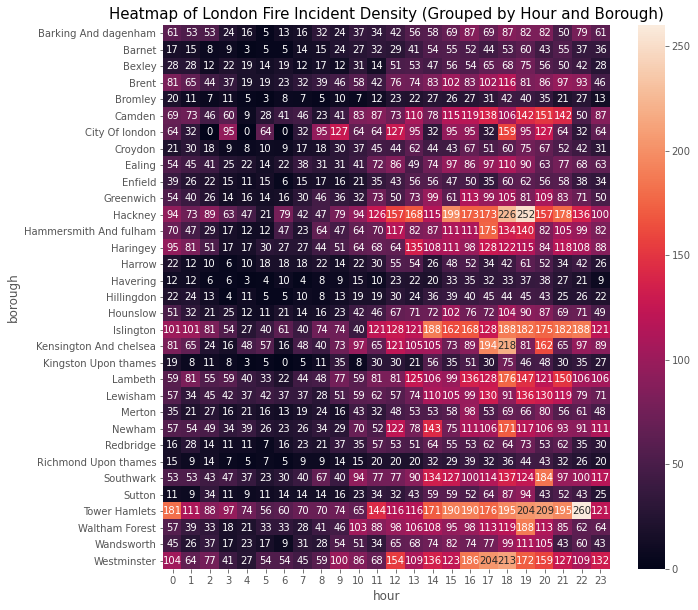

In [45]:
# Plot the heatmap of incident denisty (number of incident per 10000 hectares) grouped by hour and borough
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(hour_borough, annot=True,ax=ax, fmt="d")
plt.title("Heatmap of London Fire Incident Density (Grouped by Hour and Borough)",fontsize=15)

The heatmap shown above indicates that some areas are more likely to suffer from a fire in a specific period of hours. For example, Tower Hamlets from 22 o'clock to 23 o'clock and Hackney from 18 o'clock to 20 o'clock.

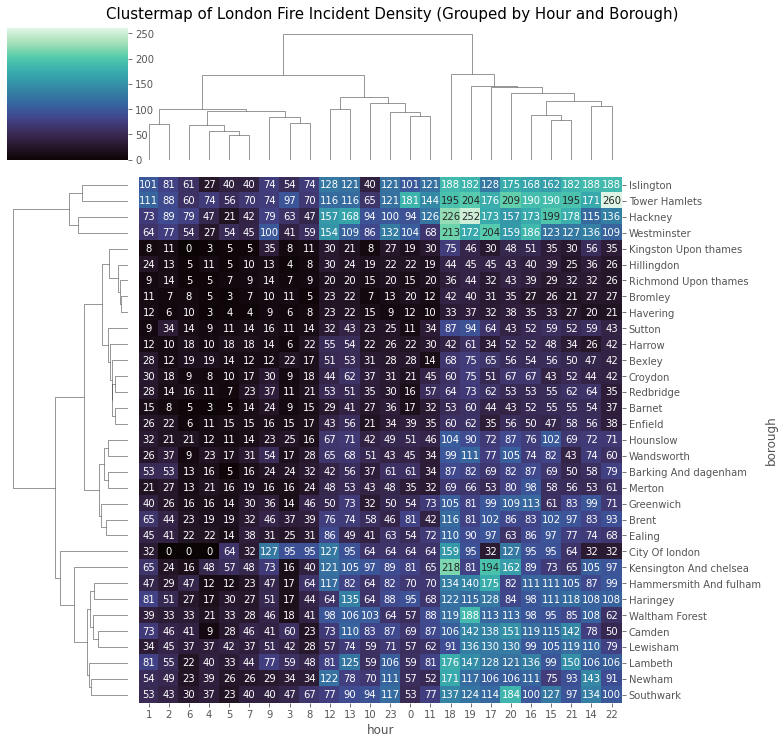

In [46]:
# Plot the clustermap of incident denisty (number of incident per 10000 hectares) grouped by hour and borough
g = sns.clustermap(hour_borough,cmap="mako",figsize=(11,10.5), annot=True, fmt="d")
g.fig.suptitle('Clustermap of London Fire Incident Density (Grouped by Hour and Borough)',fontsize = 15)
plt.tight_layout()

According to the clustermap shown above, clusters with high fire incident density exist. Tower Hamlets, Hackney, Islington and Westminster in the hour of 14:00 to 23:00 is the most dangerous as a cluster with the highest fire density. So as the City of London, Kensington and Chelsea, Hammersmith and Fulham, Haringey, Waltham Forest, Camden, Lewisham, Lambeth, Newham and Southwark in the hour of 14:00 to 23:00 with the second-highest fire density.

# 5. Discussion and Conclusion

After a series of data exploration and visualisation, in conclusion, London fire events have the following spatial and temporal distribution characteristics:

**Time:** There is a greater chance of fire during the afternoon to the evening of late spring and summer than at other times of the year. Time from 12:00 to 24:00 in April to September is the period when fires occur most frequently, especially from 19:00 to 20:00 during May.

**Space:** Boroughs, such as Tower Hamlets, Hackney, Islington and Westminster, as well as wards, such as Church Street and Bromley North have been sorted out to have the highest fire cases during the year. As for the spatial pattern, the high value of ward fire incident density showed a trend of clustering to the center of London at both borough and ward scale. Apart from the City of London, areas in Central London and the west of East London present to have higher fire risk.

**Time and Space:** As for sub-regions, Central London in the hour of 12:00 to 24:00 from April to September is more likely to break out a fire. As for boroughs, Tower Hamlets, Hackney, Islington and Westminster in the hour of 14:00 to 23:00 from April to September are more dangerous in terms of fire hazards.

Therefore, by exploring the feature of the distribution of fire incidents in London, through the time and space with higher fire risk spotted above, more efficient fire prevention strategies and measures can be inspired and applied for saving money and lives.

As fire risks have not been distinguished and weighted by fire incident features in this report, a further geographic analysis could include the trait of fire cases such as fire type, fire brigade cost and fire severity.

# References

Holborn, P. G., Nolan, P. F. and Golt, J. (2003). ‘An analysis of fatal unintentional dwelling fires investigated by London Fire Brigade between 1996 and 2000’. Fire Safety Journal, 38 (1), pp. 1–42. doi: 10.1016/S0379-7112(02)00049-8.

Holborn, P. G., Nolan, P. F. and Golt, J. (2004). ‘An analysis of fire sizes, fire growth rates and times between events using data from fire investigations’. Fire Safety Journal, 39 (6), pp. 481–524. doi: 10.1016/j.firesaf.2004.05.002.

Home Office. (2018). Fire Statistics definitions. Available at: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/922927/fire-statistics-definitions-011020.pdf.

Müllner, D. (2011). ‘Modern hierarchical, agglomerative clustering algorithms’. Available at: http://arxiv.org/abs/1109.2378.

Song, W. G., Zhang, H. P., Chen, T. and Fan, W. C. (2003). ‘Power-law distribution of city fires’. Fire Safety Journal, 38 (5), pp. 453–465. doi: 10.1016/S0379-7112(02)00084-X.

Vasiliauskas, D. and Beconytė, G. (2015). ‘Spatial analysis of fires in vilnius city in 2010–2012’. Geodesy and Cartography, 41 (1), pp. 25–30. doi: 10.3846/20296991.2015.1011862.